#2303A52154__Batch-45

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv("/content/archive (7).zip")
print("Dataset shape:", df.shape)
print(df.head())

target = "charges"
X = df.drop(columns=[target])
y = df[target]

X = pd.get_dummies(X, drop_first=True)

print("Final features:", X.columns.tolist())

Dataset shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Final features: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")


Model Performance:
RMSE: 4597.05
MAE:  2559.94
R²:   0.864


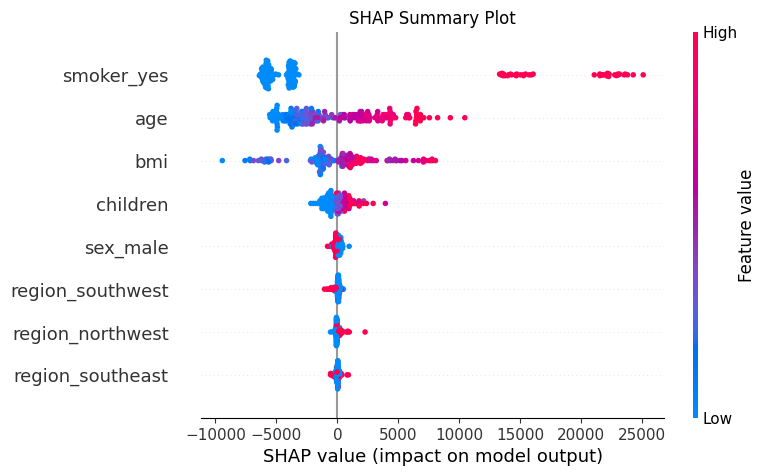

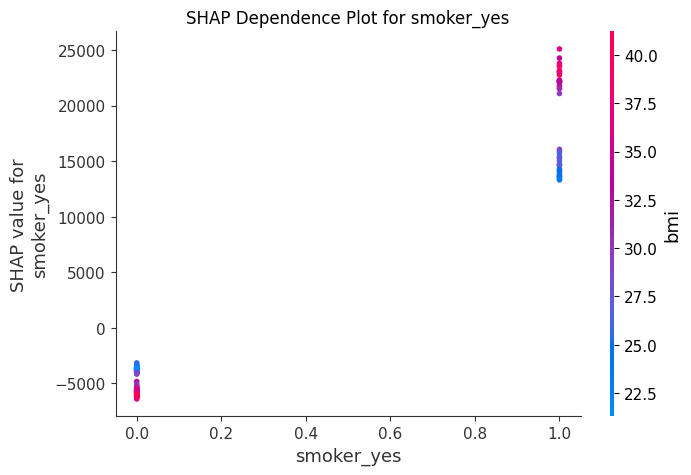

In [6]:
explainer = shap.TreeExplainer(model)

X_sample = X_test.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Summary Plot")
plt.show()

top_feature = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[::-1][0]]
shap.dependence_plot(top_feature, shap_values, X_sample, show=False)
plt.title(f"SHAP Dependence Plot for {top_feature}")
plt.show()

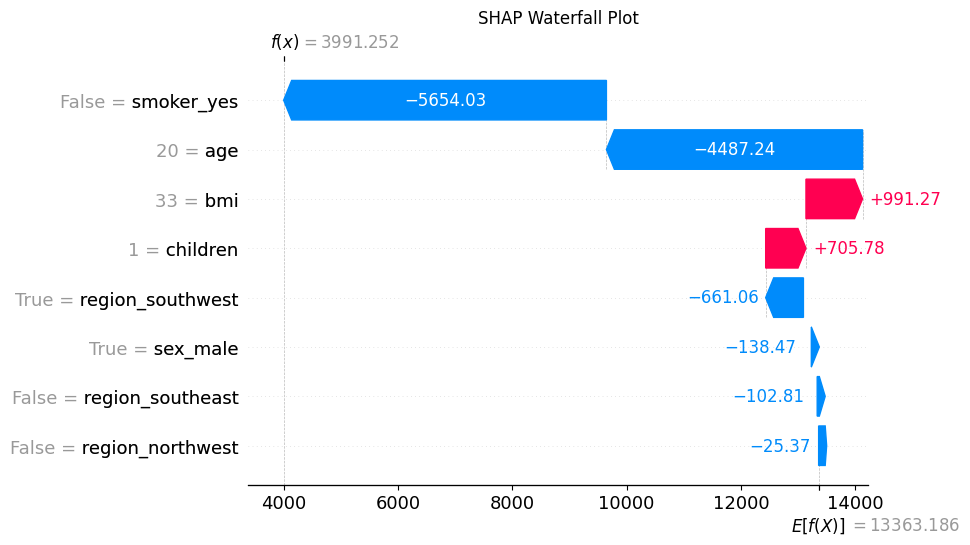


Top 10 features by model importance:
smoker_yes          0.610025
bmi                 0.214874
age                 0.134250
children            0.019428
sex_male            0.006330
region_northwest    0.005669
region_southeast    0.005268
region_southwest    0.004158
dtype: float64


In [8]:
i = 0
exp = shap.Explanation(
    values=shap_values[i],
    base_values=np.array([explainer.expected_value]),
    data=X_sample.iloc[i, :].values,
    feature_names=X_sample.columns.tolist()
)
shap.plots.waterfall(exp, max_display=12, show=False)
plt.title("SHAP Waterfall Plot")
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nTop 10 features by model importance:")
print(importances.sort_values(ascending=False).head(10))